#Exploratory Data Analysis of Fatalities in the Israeli-Palestinian Conflict



* **Course:** CS661 73544 Python Programming
*   **Instructor:** Prof. Kshitij Sharma
*   **Group-3:** Bushra Anika, Lantz Eric, Mohammed Abdul Munaf, Vemula Deepak
*   **Semester:** Fall 2024
* **Due Date:** 7 November, 2024






##EDA Goals

#### 1. **Fatality Trends Analysis**
   

#### 2. **Demographic Analysis**
   
#### 3. **Geospatial Analysis**


#### 4. **Hostilities Participation Analysis**

#### 5. **Injury Analysis**


#### 6. **Weapons and Methods Analysis**


#### 7. **Age Distribution by Injury Type**
### 8. **Gender Analysis by Hostilities Participation**  



##Understanding The Dataset
* This dataset provides information on the individuals killed during the Israeli-Palestinian conflict since the second intifada, which began in September 2000. The data has been meticulously collected and investigated by B’Tselem – The Israeli Information Center for Human Rights in the Occupied Territories.

* The dataset includes statistics on all human beings – Palestinians, Israelis, and foreign nationals – who lost their lives during this conflict. It provides details such as name, age, citizenship, date of death, gender, participation in hostilities, place of residence, type of injury, ammunition used, and more.

The columns provide specific information about each individual's death, including:

* **age:** Age of the individual.
* **citizenship:** Citizenship or nationality (e.g., Palestinian).
* **event_location:** The location of the event.
* **event_location_district and event_location_region:** More detailed geographic categorization of the event's location.
* **date_of_death:** The date on which the individual died.
* **gender:** Gender of the individual.
* **took_part_in_the_hostilities:** Whether the individual was involved in hostilities.
* **place_of_residence:** Where the individual lived.
* **place_of_residence_district:** District of residence.
* **type_of_injury:** The type of injury that led to death.
* **ammunition:** Type of ammunition used.
* **killed_by:** The responsible party (e.g., Israeli security forces).
* **notes:** Additional contextual details about the incident.

##Import Libraries and Load Data
* **Import Necessary Libraries:** `pandas`, `numpy`, `matplotlib`, `seaborn`




* **Load  the Dataset:** `fatalities_isr_pse_conflict_2000_to_2023.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")

##Initial Data Inspection
- **View Data Structure:** `.head()`, `.info()`, `.describe()`
- **Check Dimensions:** `.shape()`
- **Identify Missing Values:** `.isnull().sum()`

In [5]:
df.head(5)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [7]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [8]:
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} cols")

Dataset Shape: 11124 rows, 16 cols


In [9]:
df.isnull().sum().sort_values(ascending = False)

,0
ammunition,5253
took_part_in_the_hostilities,1430
type_of_injury,291
notes,280
age,129
place_of_residence,68
place_of_residence_district,68
gender,20
name,0
date_of_event,0


##Fatality Trends Analysis
- **Objective**: Track trends in fatalities over time, examining for any spikes, declines, or significant changes.
   

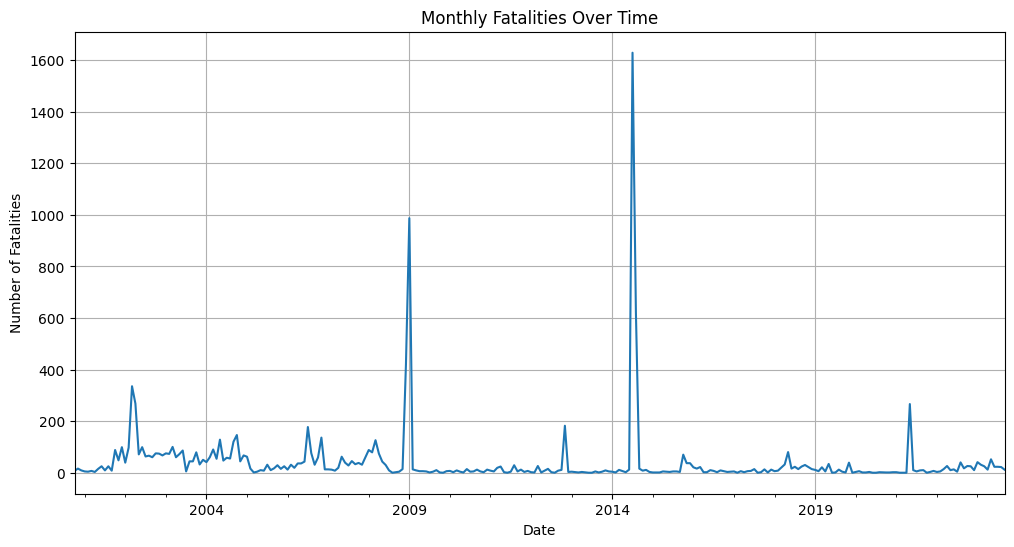

In [12]:
# Convert 'date_of_death' to datetime for time-based analysis
df['date_of_death'] = pd.to_datetime(df['date_of_death'], errors='coerce')

# Resample data by month to get monthly fatalities
monthly_fatalities = df['date_of_death'].groupby(df['date_of_death'].dt.to_period("M")).size()

# Plot fatalities over time
plt.figure(figsize=(12, 6))
monthly_fatalities.plot(kind='line')
plt.title("Monthly Fatalities Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Fatalities")
plt.grid(True)
plt.show()

## Demographic Analysis
- **Objective:** Examine age, gender, and citizenship patterns.


In [15]:
# Handling missing values for demographic analysis
df['age'] = df['age'].fillna(df['age'].median()) #replacing missing values in age with median age
df['gender'] = df['gender'].fillna('Unknown')   #replacing missing values in gender with the label unknown
df['citizenship'] = df['citizenship'].fillna('Unknown') #replace missing values in the citizenship column with 'Unknown'


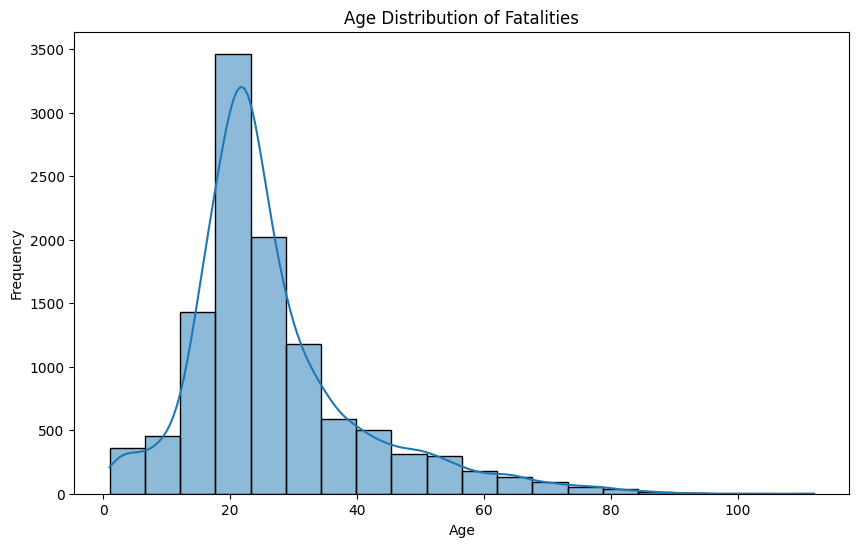

In [16]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Age Distribution of Fatalities")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

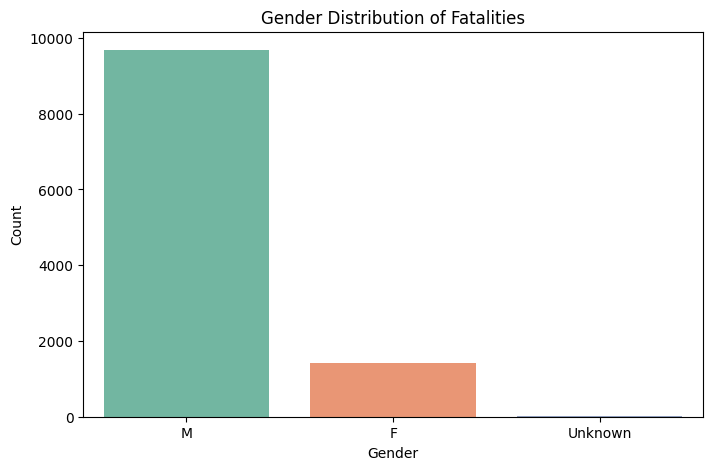

In [20]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='gender', palette="Set2", dodge=False, legend=False)
plt.title("Gender Distribution of Fatalities")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


<ipython-input-23-8ac3f2210a66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='citizenship', order=df['citizenship'].value_counts().index, palette="muted")


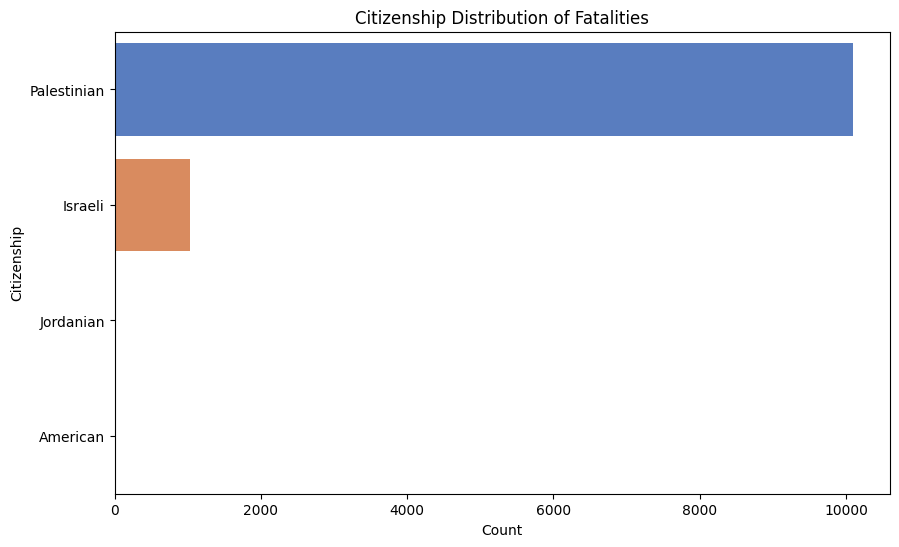

In [23]:
# Citizenship Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='citizenship', order=df['citizenship'].value_counts().index, palette="muted")
plt.title("Citizenship Distribution of Fatalities")
plt.xlabel("Count")
plt.ylabel("Citizenship")
plt.show()


##Geospatial Analysis
- **Objective:** Visualize fatalities by location to identify high-violence areas.



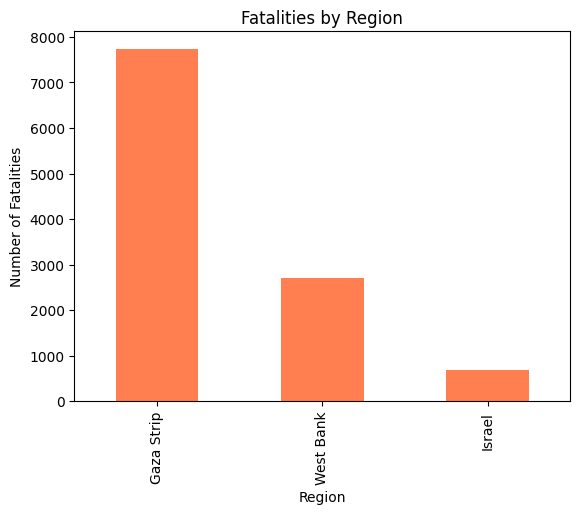

In [30]:
# Sample visualization: count fatalities by region
fatality_counts = df['event_location_region'].value_counts()
fatality_counts.plot(kind='bar', color='coral')
plt.title("Fatalities by Region")
plt.xlabel("Region")
plt.ylabel("Number of Fatalities")
plt.show()


## Hostilities Participation Analysis
- **Objective:** Compare the fatalities of those involved in hostilities versus those not.


In [33]:
# Fill nulls in 'took_part_in_the_hostilities' as 'No' (if missing values imply no participation)
df['took_part_in_the_hostilities'] = df['took_part_in_the_hostilities'].fillna('No')

<ipython-input-34-2e7893ee4dc2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='took_part_in_the_hostilities', palette="coolwarm")


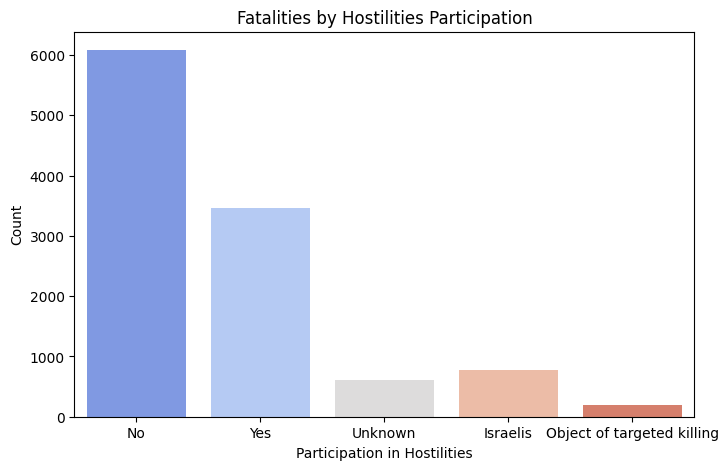

In [34]:
# Countplot for hostilities participation
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='took_part_in_the_hostilities', palette="coolwarm")
plt.title("Fatalities by Hostilities Participation")
plt.xlabel("Participation in Hostilities")
plt.ylabel("Count")
plt.show()



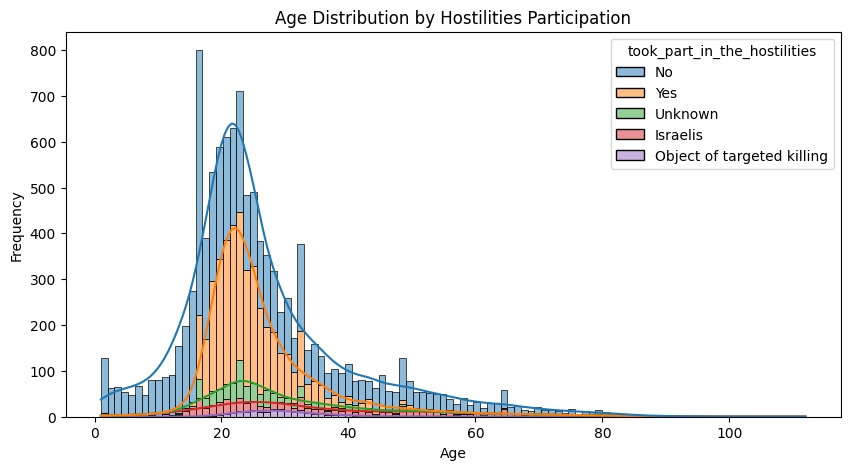

In [40]:
# Age distribution by hostilities participation
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='took_part_in_the_hostilities', multiple="stack", kde=True)
plt.title("Age Distribution by Hostilities Participation")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


## Injury Analysis
- **Objective:** Examine types of injuries and their distribution.


In [43]:
# Fill missing 'type_of_injury' as 'Unknown'
df['type_of_injury'].fillna('Unknown', inplace=True)

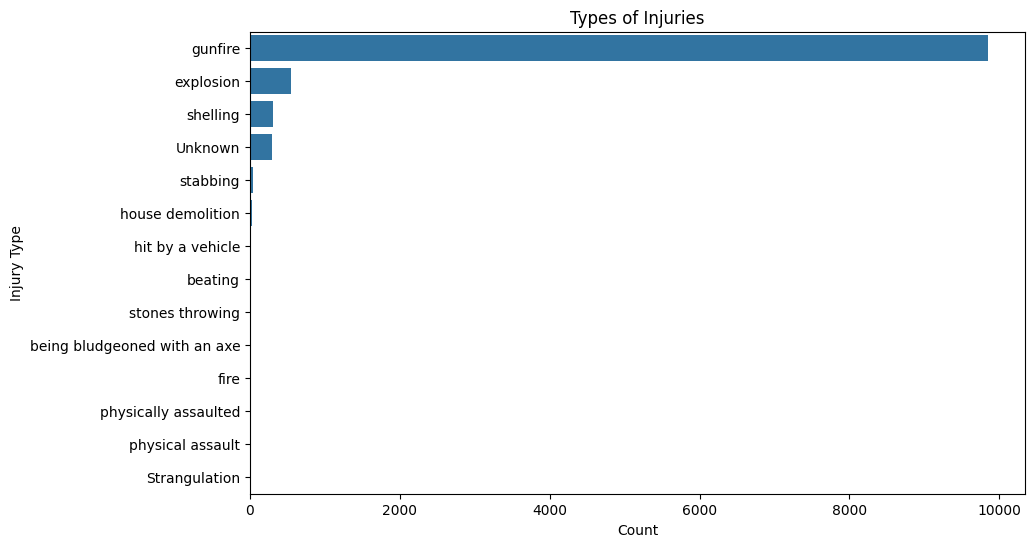

In [44]:
# Count of injury types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='type_of_injury', order=df['type_of_injury'].value_counts().index)
plt.title("Types of Injuries")
plt.xlabel("Count")
plt.ylabel("Injury Type")
plt.show()


## Weapons and Methods Analysis
- **Objective:** Analyze weapons used in fatalities.


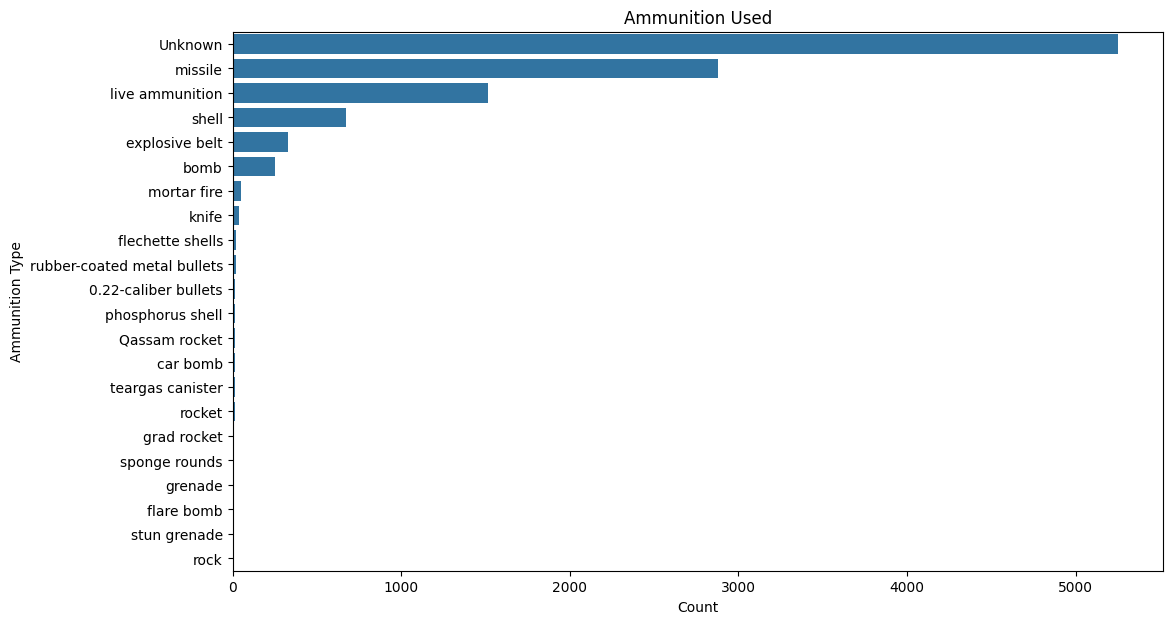

In [53]:
# Fill missing 'ammunition' as 'Unknown'
df['ammunition'].fillna('Unknown', inplace=True)

# Count plot of ammunition types
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='ammunition', order=df['ammunition'].value_counts().index)
plt.title("Ammunition Used")
plt.xlabel("Count")
plt.ylabel("Ammunition Type")
plt.show()


## 7. Age Distribution by Injury Type



<ipython-input-65-c6f8d2e8e0e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_of_injury', y='age', palette='Set2')


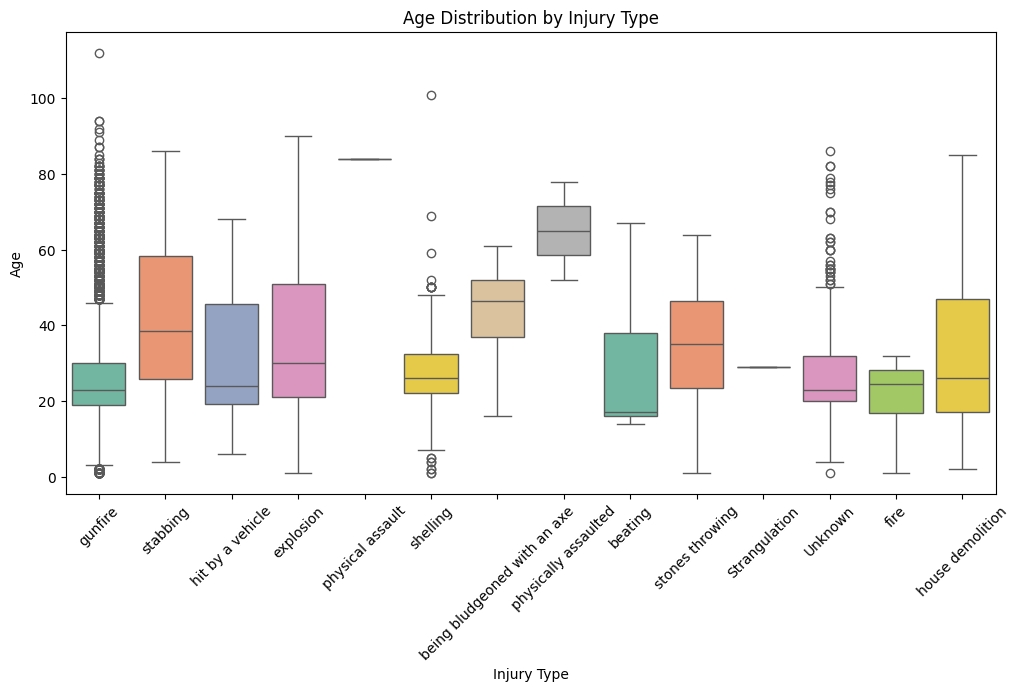

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type_of_injury', y='age', palette='Set2')
plt.title("Age Distribution by Injury Type")
plt.xlabel("Injury Type")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


## 8. Gender Analysis by Hostilities Participation  


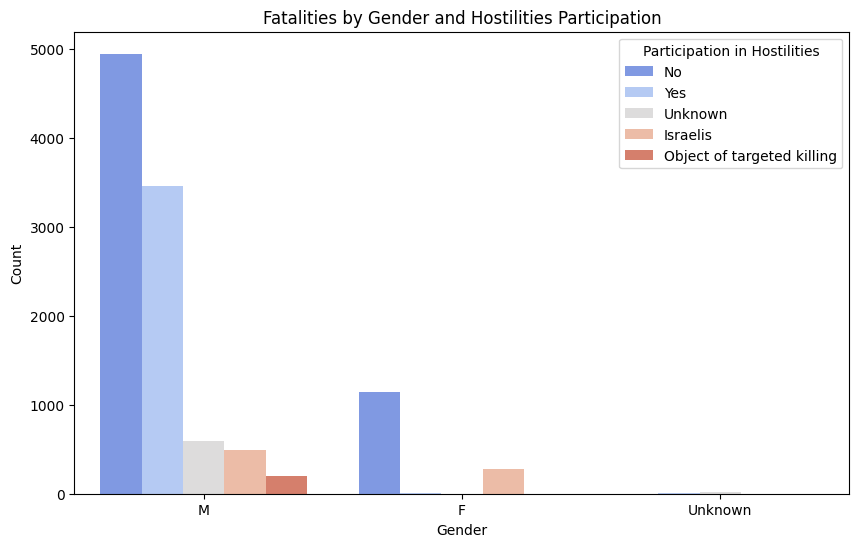

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='took_part_in_the_hostilities', palette='coolwarm')
plt.title("Fatalities by Gender and Hostilities Participation")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Participation in Hostilities')
plt.show()
